# Neural network (node=1 to 10) + minimize BFGS scipy python

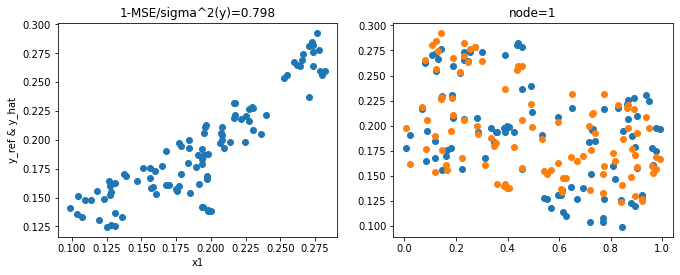

[ 0.58878875  0.15505865 -0.52342065  0.58434708  0.31856638]







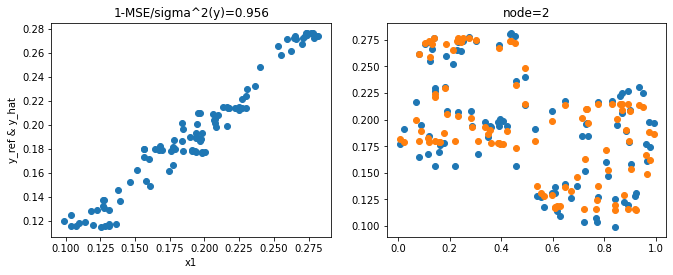

[ 0.19715449 -0.05081265 -1.68553961 -0.66397762  5.1369907   0.5331533
 -0.03198703 -8.98547348 17.09643394]







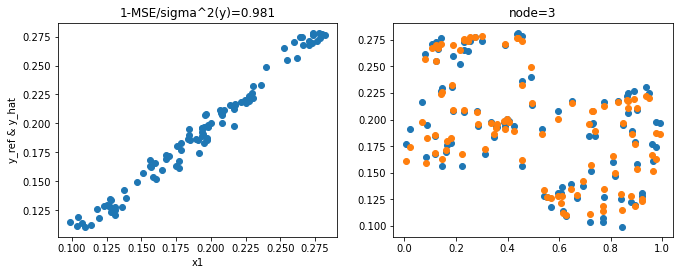

[ 2.91269999e-01  1.62855045e+00 -4.58301550e-01  3.82666701e-02
  8.25388222e-01 -1.11357685e+00 -6.33605509e-01 -1.58293744e-03
  1.40596143e+00  3.25418704e-01 -4.64119006e-02 -5.35064563e+00
  9.85398491e+00]







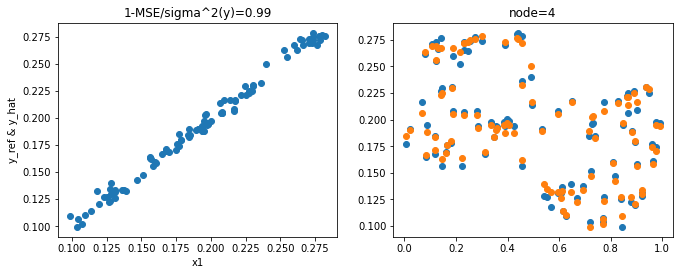

[ 1.84568011e-01  1.99310782e+00  2.53823871e-02 -4.41472231e-01
  5.87756520e-01 -8.99006633e-01 -4.88613561e-01 -1.80686637e-01
  1.45291605e+00  4.73666659e-01  2.15415168e+00 -3.90501136e+00
  1.47188119e-01  1.37579647e-03 -9.60261814e-01  1.27108985e+00
 -2.32509038e+00]







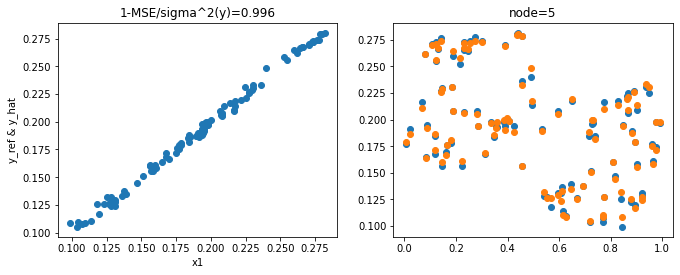

[ 0.43690804 -0.32237272  2.41939331 -3.20098808 -0.33878041 -0.36942465
  1.5973707   0.12256797 -1.47271634 -0.38407072 -1.98614619  3.17361356
  0.22729558 -0.23319557 -1.31632678  0.06528044  2.2348937   0.68944564
  0.0700298  -2.30984179  6.3576299 ]







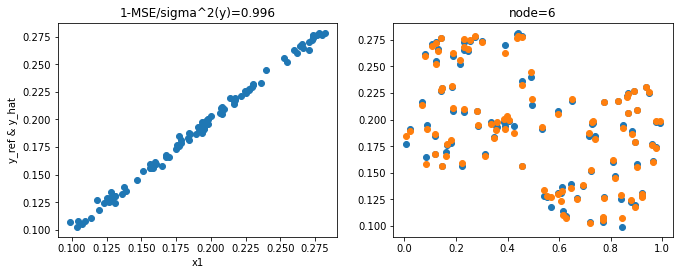

[ 0.12895472 -2.53176252 -0.49388583  0.19347182  1.50405789  2.32942539
  2.91061276 -0.47683402  1.27172717 -0.08961746 -3.4052122   5.9085169
  0.22230941  0.23138344 -0.95243385  0.19508282  3.31795929  2.79506433
 -0.36541517  0.24252821  1.03425295  0.97330998 -2.33255472  1.90124158
  3.42164452]







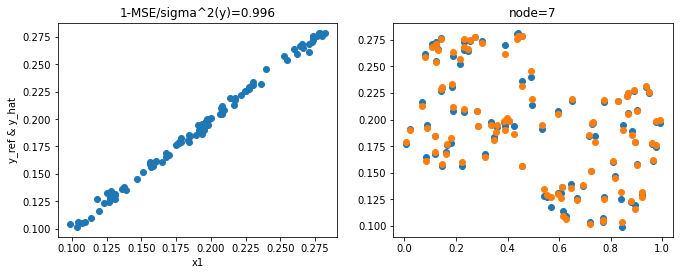

[-0.14837892 -0.07742891 -3.86105748  6.5646318   0.21719118 -0.13289636
 -1.98477323 -0.08509311  3.48427558  0.10528977  1.18370292  2.61142817
 -1.33083892 -0.95636765  1.29072757  1.94698214 -0.28197958 -0.26258606
  1.20104523  0.30610677 -0.14036536 -0.54288969  1.25363096  0.1268711
 -1.37089079  0.70125646  3.10151548  0.59198896  0.12817576]







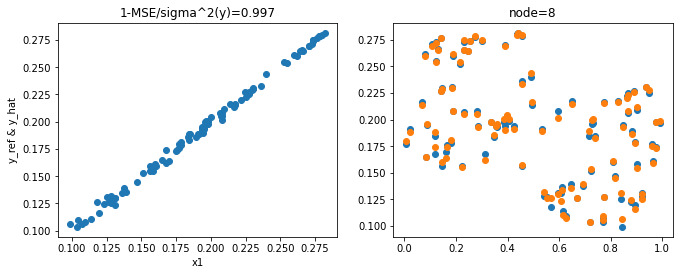

[ 0.05690486  1.73376576 -1.66478363  4.88277497  0.05241486  2.55194736
 -0.06897444  0.12375586  0.45291617  0.70701391  0.91965162  0.28604103
  0.42151471 -0.56239054  1.04959583  0.36352544  0.90562976  1.56439087
 -0.25967971  0.05026776  0.96938638 -1.62501986 -0.81163271  0.08779669
  1.51287371 -0.96708429  0.5517163   0.11672606  1.82826683  0.23733639
 -1.89504933 -1.5740379   4.54598141]







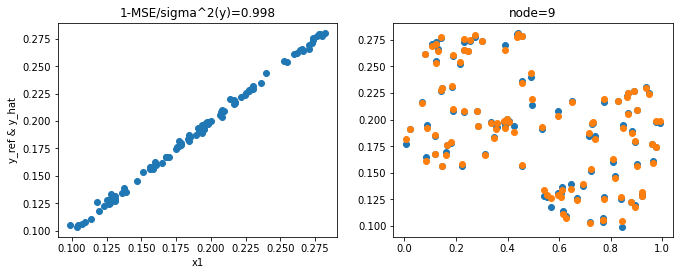

[-1.77596513  1.70515191  1.71891205 -3.5275947  -0.01403352 -0.52796232
  1.22108226 -0.06101797  0.92807798  2.29221403  0.88020813  0.07051634
 -0.22031962  2.56969641 -1.35820228  3.06308533  0.00572198  1.67055802
  1.10814843 -0.05552689 -0.22700248 -0.49269179 -1.61026789  0.0667205
  2.77827803 -0.12188844  2.00088115  0.06932434  1.00466364 -0.97017088
 -0.8040195   2.57991421 -0.01975224  0.68743723 -0.9366979   1.16268461
 -0.06307846]







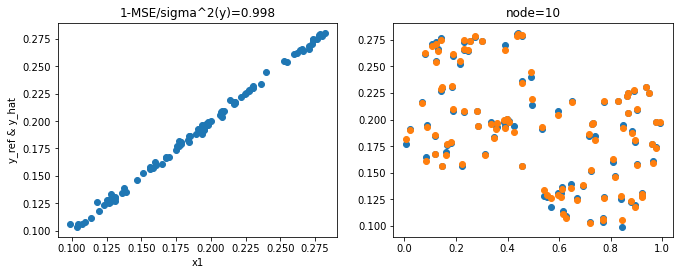

[-0.06760507 -1.25452843  0.52836309 -1.09162182 -0.29049011  0.33863261
  0.99277024  0.42235446  0.01886463  0.66794641 -0.83787296  2.04886818
 -0.00635082 -1.46318764  1.29453746 -0.07050849 -2.01660871  0.93051443
  1.18533836 -0.54582686 -0.4805365   1.05297645  1.51144039 -0.06229487
 -2.5177125  -0.2534283  -0.35812931  3.48799979 -0.00841237  1.31901198
  0.27938527 -0.80617252 -0.46201964 -0.14697798  1.65866796  0.87664925
  0.66430989  0.85551993  0.40909325  2.0814467  -3.84752235]







In [38]:
%reset -f

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
import numpy as np

Nx=2
Nv_ref=6+1


Ndata=100


def func_minmax(x,xmin,L):
    return np.minimum(np.maximum(x,xmin),xmin+L)

def func_synth(x,b):
    x1=x[:,0]
    x2=x[:,1]
    #temp=b[0]+b[1]*func_minmax(x1,b[2],b[3])+b[4]*func_minmax(x2,b[5],b[6])
    #temp=b[0]+b[1]*func_minmax(x1,b[2],b[3])+b[4]*func_minmax(x1,b[2]+b[3]+b[5],b[6])
    temp=0.1+0.2*func_minmax(x1,0.2,0.25)-0.3*func_minmax(x1,0.4,0.3)+0.15*np.maximum(x1,0.5)-0.1*np.minimum(x1,0.8)
    temp+=0.2+0.1*func_minmax(x2,0.25,0.2)-0.25*func_minmax(x2,0.3,0.4)+0.12*np.maximum(x2,0.4)-0.12*np.minimum(x2,0.7)
    #temp+=0.14*np.tanh(10*(x1-0.7))
    #temp+=b[0]+b[1]*x1+b[2]*x2+b[3]*abs(x1-b[4])+b[5]*abs(x2-b[6])
    #temp+=b[1]*x1*x2+b[2]*np.cos(x1)+b[3]*np.sqrt(x1)+b[4]*np.sqrt(x2)+b[5]*x1*x1+b[6]*x2*x2
    return temp

xdata = np.random.rand(Ndata,Nx)
ydata=np.zeros(Ndata)

b_ref=np.random.rand(Nv_ref)/4
y_ref=func_synth(xdata,b_ref)


node1=5
Nv_predict1=1+(Nx+2)*node1

node0=2
Nv_predict0=1+(Nx+2)*node0

b0=0.1*np.random.rand(Nv_predict0)
b1=0.1*np.random.rand(Nv_predict1)


def func_predict(x,b,node):
    x1=x[:,0]
    x2=x[:,1]
    temp=b[0]
    t=len(x[0,:])+2
    for i in range(node):
        temp+=b[(i-1)*t+1]*np.tanh(b[(i-1)*t+2]+b[(i-1)*t+3]*x1+b[(i-1)*t+4]*x2)
    return temp

def mse_(b,x,y,node):
    yhat=func_predict(x,b,node)
    return np.sum((yhat-y)*(yhat-y))/len(y)


x1=xdata[:,0]
x2=xdata[:,1]


# plt.figure(0)
# plt.scatter(x1,y_ref)
# plt.show()


yhat=func_predict(xdata,b0,node0)

oo=np.ones(Nv_predict0)

for i in range(10+1):
    if i>=1:
        node=i
        Nv_predict=1+(Nx+2)*node

        
        #iter for each number of nodes
        for j in range(10):
            
            #starting point search
            for k in range(100):
                b=np.random.rand(Nv_predict)
                if k>=1:
                    if mse_(b,xdata,y_ref,node)<mse_(b_better,xdata,y_ref,node): 
                        b_better=b
                b_better=b
            b=b_better
                    
            res = minimize(mse_, b, args=(xdata,y_ref,node), method='BFGS',options={'disp': False})
            b=res.x

            if j>=1:
                if mse_(b_old,xdata,y_ref,node)<mse_(b,xdata,y_ref,node):
                    b=b_old
            
            yhat=func_predict(xdata,b,node)
            mse_0=mse_(b,xdata,y_ref,node)
            err_index=1-mse_0/(np.std(y_ref) ** 2)
            err_index=round(err_index,3)
            
            b_old=b;
        
        fig=plt.figure(i+2)
        ax1 = fig.add_subplot(121)
        ax2= fig.add_subplot(122)
        
        ax1.scatter(y_ref,yhat)
        ax2.scatter(x1,y_ref)
        ax2.scatter(x1,yhat)
        
        ax1.set_title('1-MSE/sigma^2(y)='+str(err_index))
        ax2.set_title('node='+str(node))
        
        ax1.set_xlabel('y_ref')
        ax1.set_ylabel('y_hat')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('y_ref & y_hat')        
        
        fig.set_size_inches(28/2.54,10/2.54)
        
        plt.show()
        
        print(b)
        print('\n\n\n\n')


